## Кластеризация текста на основе датасета со спарсенными статьями хабр

___

### 1. Подключение библиотек

In [3]:
import pandas as pd
import string
import re
import nltk
import pymorphy3

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ROG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
df =pd.read_csv("habr_parsing.csv")

In [5]:
df.head()

,title,namecompany,description,rating,field,date,textpub,views
0,SSTI в Python под микроскопом: разбираем Pytho...,BI.ZONE,Компания,76.41,"Программное обеспечение, Веб-сервисы, Информац...",2025-04-09,"Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...",NaN
1,Противовирусная жевательная резинка,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,169.07,"Аппаратное обеспечение, Связь и телекоммуникац...",2025-04-09,"Пандемия, последствия которой до сих пор наб...",NaN
2,Keycloak: как упростить аутентификацию и не со...,Clevertec,"Цифровые решения для бизнеса | финтех, логистика",59.14,"Программное обеспечение, Мобильные технологии,...",2025-04-09,"Привет! Я Диана, системный аналитик в Cleverte...",NaN
3,Из чего сделаны GPU от Т1 Облако? Фотообзор и ...,Холдинг Т1,Многопрофильный ИТ-холдинг,125.41,"Программное обеспечение, Аппаратное обеспечени...",2025-04-09,"Привет, Хабр. На связи команда Т1 Облако. Если...",NaN
4,Фундаментальные науки и ИТ: создание исследова...,Инферит,Компания,229.82,"Программное обеспечение, Аппаратное обеспечение",2025-04-09,Развитие информационных технологий — от первых...,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        90 non-null     object 
 1   namecompany  90 non-null     object 
 2   description  90 non-null     object 
 3   rating       90 non-null     float64
 4   field        89 non-null     object 
 5   date         90 non-null     object 
 6   textpub      90 non-null     object 
 7   views        0 non-null      float64
dtypes: float64(2), object(6)
memory usage: 5.8+ KB


In [7]:
df = df.drop(columns="views")

___

### 2. Предварительная обработка данных

1. Перевод всех букв в тексте в нижний регистр
2. Удаление знаков препинания
3. Токенизация по словам
4. Удаление стоп слов
5. Стемминг (приведение слов к нормальной форме)
6. Лемматизация

In [8]:
def remove_punctuation(text): 
    return "".join([ch if ch not in string.punctuation else ' ' for ch in text])

def remove_numbers(text): 
    return ''.join([i if not i.isdigit() else ' ' for i in text])

def remove_multiple_spaces(text): 
    return re.sub(r'\s+', ' ', text, flags=re.I)

st = '❯\xa0—«»'
def remove_othersymbol(text):
    return ''.join([ch if ch not in st else ' ' for ch in text])

In [9]:
df['text_new'] = [remove_multiple_spaces(remove_numbers(remove_othersymbol(remove_punctuation(text.lower())))) for text in df['textpub']]

In [10]:
df.head()

,title,namecompany,description,rating,field,date,textpub,text_new
0,SSTI в Python под микроскопом: разбираем Pytho...,BI.ZONE,Компания,76.41,"Программное обеспечение, Веб-сервисы, Информац...",2025-04-09,"Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...",привет хабр меня зовут сергей арефьев я специа...
1,Противовирусная жевательная резинка,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,169.07,"Аппаратное обеспечение, Связь и телекоммуникац...",2025-04-09,"Пандемия, последствия которой до сих пор наб...",пандемия последствия которой до сих пор наблю...
2,Keycloak: как упростить аутентификацию и не со...,Clevertec,"Цифровые решения для бизнеса | финтех, логистика",59.14,"Программное обеспечение, Мобильные технологии,...",2025-04-09,"Привет! Я Диана, системный аналитик в Cleverte...",привет я диана системный аналитик в clevertec ...
3,Из чего сделаны GPU от Т1 Облако? Фотообзор и ...,Холдинг Т1,Многопрофильный ИТ-холдинг,125.41,"Программное обеспечение, Аппаратное обеспечени...",2025-04-09,"Привет, Хабр. На связи команда Т1 Облако. Если...",привет хабр на связи команда т облако если вы ...
4,Фундаментальные науки и ИТ: создание исследова...,Инферит,Компания,229.82,"Программное обеспечение, Аппаратное обеспечение",2025-04-09,Развитие информационных технологий — от первых...,развитие информационных технологий от первых а...


In [11]:
russian_stopwords = stopwords.words("russian") 
russian_stopwords.extend(['т.д.', 'т', 'д', 'это','который', 'которая', 'с','своём','всем','наш', 'свой', 'ещё', "еще", "также", "так же", "всякий"]) 

In [12]:
def tokenize_text(text):
    t = word_tokenize(text)
    tokens = [token for token in t if not re.search(r'[a-zA-Z]', token)]
    text = " ".join(tokens)
    return text

In [13]:
df['tokenize_texts'] = df['text_new'].apply(tokenize_text)

In [14]:
stemmer = SnowballStemmer("russian")

stem_list = []
for text in (df['tokenize_texts']):
    try:
        tokens = word_tokenize(text)
        res = list()
        for word in tokens:
            p = stemmer.stem(word)
            res.append(p)
        text = " ".join(res)
        stem_list.append(text)
    except Exception as e:
        print(e)
        
df['text_stem'] = stem_list

In [15]:
morph = pymorphy3.MorphAnalyzer(lang='ru')

In [16]:
%%time
lemm_texts_list = []
for text in df['tokenize_texts']:
    try:
        tokens = word_tokenize(text)
        res = []
        for word in tokens:
            p = morph.parse(word)[0]
            res.append(p.normal_form)
        text = " ".join(res)
        lemm_texts_list.append(text)
    except Exception as e:
        print(e)
        lemm_texts_list.append("")

df['text_lemm'] = lemm_texts_list

CPU times: total: 13.4 s
Wall time: 13.4 s


In [17]:
df.head()

,title,namecompany,description,rating,field,date,textpub,text_new,tokenize_texts,text_stem,text_lemm
0,SSTI в Python под микроскопом: разбираем Pytho...,BI.ZONE,Компания,76.41,"Программное обеспечение, Веб-сервисы, Информац...",2025-04-09,"Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...",привет хабр меня зовут сергей арефьев я специа...,привет хабр меня зовут сергей арефьев я специа...,привет хабр мен зовут серг ареф я специалист о...,привет хабра я звать сергей арефьев я специали...
1,Противовирусная жевательная резинка,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,169.07,"Аппаратное обеспечение, Связь и телекоммуникац...",2025-04-09,"Пандемия, последствия которой до сих пор наб...",пандемия последствия которой до сих пор наблю...,пандемия последствия которой до сих пор наблюд...,пандем последств котор до сих пор наблюда по в...,пандемия последствие который до сей пора наблю...
2,Keycloak: как упростить аутентификацию и не со...,Clevertec,"Цифровые решения для бизнеса | финтех, логистика",59.14,"Программное обеспечение, Мобильные технологии,...",2025-04-09,"Привет! Я Диана, системный аналитик в Cleverte...",привет я диана системный аналитик в clevertec ...,привет я диана системный аналитик в и экс преп...,привет я диа системн аналитик в и экс преподав...,привет я диана системный аналитик в и экс преп...
3,Из чего сделаны GPU от Т1 Облако? Фотообзор и ...,Холдинг Т1,Многопрофильный ИТ-холдинг,125.41,"Программное обеспечение, Аппаратное обеспечени...",2025-04-09,"Привет, Хабр. На связи команда Т1 Облако. Если...",привет хабр на связи команда т облако если вы ...,привет хабр на связи команда т облако если вы ...,привет хабр на связ команд т облак есл вы след...,привет хабра на связь команда так облако если ...
4,Фундаментальные науки и ИТ: создание исследова...,Инферит,Компания,229.82,"Программное обеспечение, Аппаратное обеспечение",2025-04-09,Развитие информационных технологий — от первых...,развитие информационных технологий от первых а...,развитие информационных технологий от первых а...,развит информацион технолог от перв алгоритм д...,развитие информационный технология от первый а...


In [18]:
df['text_lemm'] = df['text_lemm'].apply(lambda x: ' '.join([word for word in x.split() if word not in russian_stopwords]))

___

# Облако слов

In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
# Получение текстовой строки из списка слов
def str_corpus(corpus):
    str_corpus = ''
    for i in corpus:
        str_corpus += ' ' + i
    str_corpus = str_corpus.strip()
    return str_corpus

# Получение списка всех слов в корпусе
def get_corpus(data):
    corpus = []
    for phrase in data:
        for word in phrase.split():
            corpus.append(word)
    return corpus

# Получение облака слов
def get_wordCloud(corpus):
    wordCloud = WordCloud(background_color='white',
                              stopwords=STOPWORDS,
                              width=3000,
                              height=2500,
                              max_words=200,
                              random_state=42
                         ).generate(str_corpus(corpus))
    return wordCloud

<Axes: >

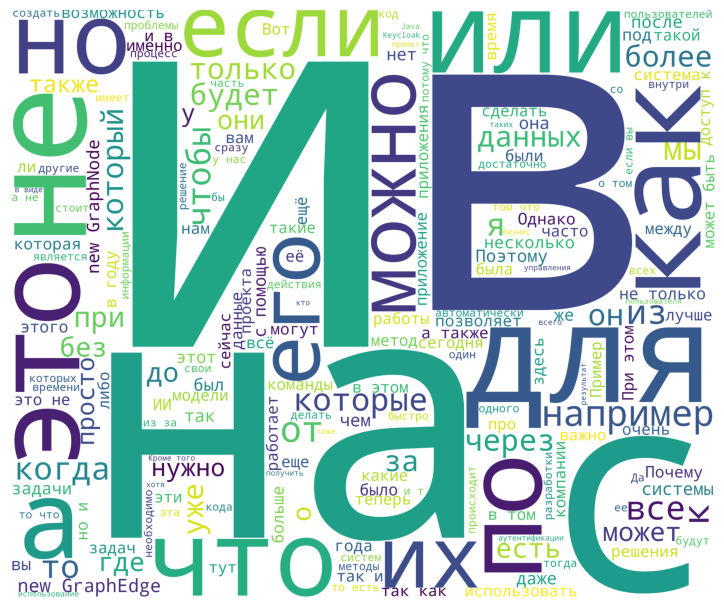

In [21]:
corpus = get_corpus(df['textpub'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

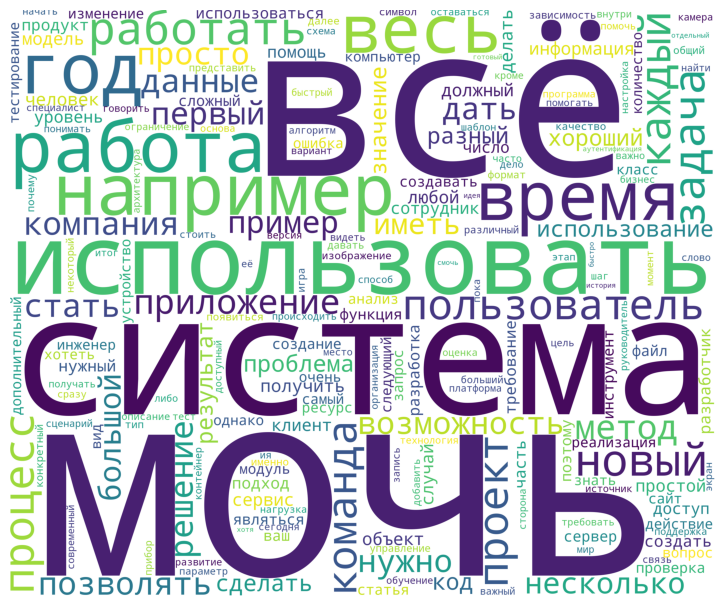

In [22]:
corpus = get_corpus(df['text_lemm'].values)
procWordCloud = get_wordCloud(corpus)

fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

___

## Векторизация текстовых данных

#### **Bag of words**

Смотрим наличие слов в текстовых данных

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
df['text_lemm'][0]

'привет хабра звать сергей арефьев специалист отдел анализ защищённость приложение компания статья хотеть подробно раскрыть тема контекст сразу оговориться новый ресерч вектор лишь взять известный посмотреть почему работать полный понимание вопрос рассмотреть импакт атаковать мочь получить использовать пять самый популярный шаблонизатор кроме немного углубиться работа известный поделиться опыт вариант улучшение мочь полезный тестирование несколько слово шаблонизаторахначнуть базовый шаблонизатор применяться встретить шаблонизатор инструмент динамический генерация текстовый данные основа заранее задать шаблон частый весь встретить веб приложение использоваться рендеринг страница сервер последний несколько год концепция стать менее популярный уступить место клиентский рендеринг формироваться непосредственно браузер помощь фреймворк всё шаблонизатор прежний применять самый разный задача лишь некоторый генерация автоматический рассылка генерация конфигурационный файл генерация отчёт ⚠ опыт

In [25]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text_lemm'])

CountVectorizer()

In [26]:
print(vectorizer.vocabulary_)

{'привет': 7016, 'хабра': 10232, 'звать': 2593, 'сергей': 8379, 'арефьев': 264, 'специалист': 8887, 'отдел': 5614, 'анализ': 195, 'защищённость': 2586, 'приложение': 7095, 'компания': 3425, 'статья': 9042, 'хотеть': 10300, 'подробно': 6414, 'раскрыть': 7789, 'тема': 9355, 'контекст': 3516, 'сразу': 8965, 'оговориться': 5304, 'новый': 5046, 'ресерч': 8027, 'вектор': 748, 'лишь': 3901, 'взять': 834, 'известный': 2720, 'посмотреть': 6723, 'почему': 6799, 'работать': 7578, 'полный': 6559, 'понимание': 6630, 'вопрос': 1063, 'рассмотреть': 7834, 'импакт': 2822, 'атаковать': 309, 'мочь': 4399, 'получить': 6584, 'использовать': 3012, 'пять': 7572, 'самый': 8216, 'популярный': 6662, 'шаблонизатор': 10505, 'кроме': 3726, 'немного': 4816, 'углубиться': 9686, 'работа': 7575, 'поделиться': 6354, 'опыт': 5471, 'вариант': 707, 'улучшение': 9784, 'полезный': 6537, 'тестирование': 9398, 'несколько': 4928, 'слово': 8592, 'шаблонизаторахначнуть': 10506, 'базовый': 345, 'применяться': 7109, 'встретить': 1

In [27]:
vectorizer = CountVectorizer(analyzer='word', stop_words=russian_stopwords, ngram_range=(1, 3), min_df=2)
count_matrix = vectorizer.fit_transform(df['text_lemm'])

In [28]:
count_matrix.shape

(90, 9824)

In [29]:
vectorizer.get_feature_names_out()[45000:46000]

array([], dtype=object)

In [30]:
print(count_matrix)

  (0, 6334)	1
  (0, 9366)	1
  (0, 2301)	1
  (0, 7663)	1
  (0, 8239)	1
  (0, 5085)	1
  (0, 110)	1
  (0, 2297)	1
  (0, 6399)	9
  (0, 3143)	4
  (0, 8417)	3
  (0, 9410)	4
  (0, 5674)	1
  (0, 7166)	1
  (0, 8675)	2
  (0, 3255)	10
  (0, 8310)	3
  (0, 4777)	1
  (0, 4459)	1
  (0, 576)	3
  (0, 3499)	5
  (0, 709)	2
  (0, 2461)	3
  (0, 6075)	3
  (0, 6142)	1
  :	:
  (89, 7124)	1
  (89, 4706)	1
  (89, 6799)	1
  (89, 1655)	1
  (89, 1445)	1
  (89, 8722)	2
  (89, 3917)	1
  (89, 6454)	1
  (89, 4632)	1
  (89, 6455)	1
  (89, 573)	1
  (89, 4472)	1
  (89, 9572)	1
  (89, 9573)	1
  (89, 9806)	1
  (89, 1063)	1
  (89, 5778)	1
  (89, 5445)	1
  (89, 2451)	1
  (89, 616)	2
  (89, 8162)	2
  (89, 19)	2
  (89, 7564)	1
  (89, 3340)	1
  (89, 3341)	1


### **TF-IDF**

Вычисляем «относительную частоту» появления слова в одном документе по сравнению с его частотой во всех разом

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=6,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))

In [33]:
%%time
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])

CPU times: total: 578 ms
Wall time: 574 ms


In [34]:
tfidf_matrix.shape

(90, 6)

In [35]:
tfidf_vectorizer.get_feature_names_out()[:100]

array(['год', 'данные', 'задача', 'новый', 'процесс', 'система'],
      dtype=object)

In [36]:
print(tfidf_matrix)

  (0, 3)	0.11507559767049533
  (0, 1)	0.8432072516578033
  (0, 0)	0.1291873939292064
  (0, 2)	0.1261827340766584
  (0, 5)	0.49310006331696143
  (1, 3)	0.2570284423624734
  (1, 0)	0.9618266978886086
  (1, 4)	0.09394563877805001
  (2, 3)	0.2372197437556521
  (2, 1)	0.09932621298909443
  (2, 2)	0.026011627530071163
  (2, 5)	0.9656644795436049
  (2, 4)	0.026011627530071163
  (3, 3)	0.15510949993906123
  (3, 1)	0.8118231952189711
  (3, 2)	0.5102421672303562
  (3, 5)	0.16616143167906283
  (3, 4)	0.17008072241011876
  (4, 3)	0.1718058376550135
  (4, 1)	0.179841936357427
  (4, 0)	0.5786235017095951
  (4, 2)	0.7535543856210084
  (4, 4)	0.1883885964052521
  (5, 1)	0.05403236296811318
  (5, 2)	0.05660015247940581
  :	:
  (83, 3)	0.4789380572328083
  (83, 0)	0.3584470308790028
  (83, 2)	0.3501102158834362
  (83, 5)	0.17102118891634152
  (83, 4)	0.7002204317668724
  (84, 2)	0.742759297630081
  (84, 5)	0.20732667664802706
  (84, 4)	0.6366508265400693
  (85, 3)	0.12025655362788006
  (85, 1)	0.1258814

___

## Кластеризация данных

### **K-means**

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\ROG\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


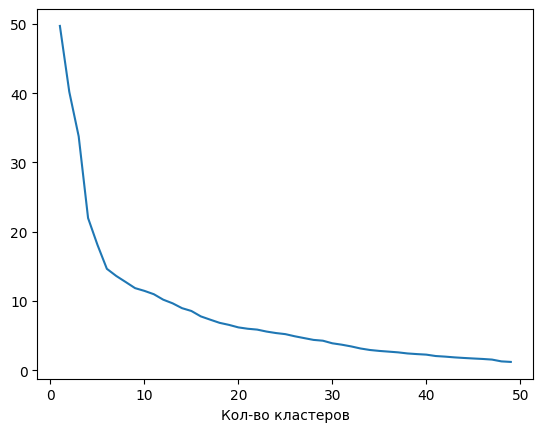

In [38]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(tfidf_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 50), wcss)
plt.xlabel('Кол-во кластеров')
plt.show()

In [39]:
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state = 42)

In [40]:
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [41]:
pred=kmeans.fit_predict(tfidf_matrix)

cluster
2    24
1    23
3    17
0    14
4    12
Name: count, dtype: int64


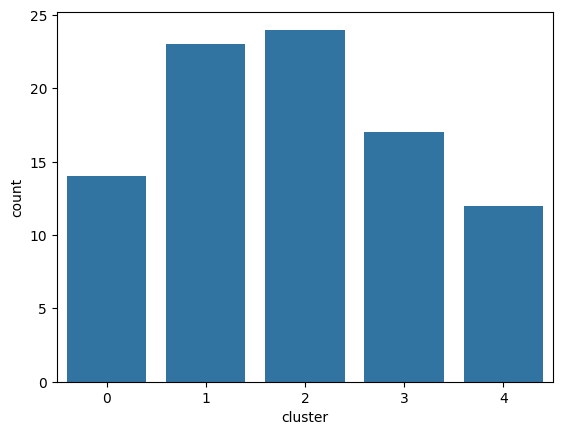

In [42]:
# Смотрим распределение по кластерам
df['cluster'] = pred
print(df['cluster'].value_counts())
sns.countplot(x='cluster', data=df)
plt.show()

In [43]:
df.head()

,title,namecompany,description,rating,field,date,textpub,text_new,tokenize_texts,text_stem,text_lemm,cluster
0,SSTI в Python под микроскопом: разбираем Pytho...,BI.ZONE,Компания,76.41,"Программное обеспечение, Веб-сервисы, Информац...",2025-04-09,"Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...",привет хабр меня зовут сергей арефьев я специа...,привет хабр меня зовут сергей арефьев я специа...,привет хабр мен зовут серг ареф я специалист о...,привет хабра звать сергей арефьев специалист о...,3
1,Противовирусная жевательная резинка,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,169.07,"Аппаратное обеспечение, Связь и телекоммуникац...",2025-04-09,"Пандемия, последствия которой до сих пор наб...",пандемия последствия которой до сих пор наблю...,пандемия последствия которой до сих пор наблюд...,пандем последств котор до сих пор наблюда по в...,пандемия последствие сей пора наблюдаться весь...,2
2,Keycloak: как упростить аутентификацию и не со...,Clevertec,"Цифровые решения для бизнеса | финтех, логистика",59.14,"Программное обеспечение, Мобильные технологии,...",2025-04-09,"Привет! Я Диана, системный аналитик в Cleverte...",привет я диана системный аналитик в clevertec ...,привет я диана системный аналитик в и экс преп...,привет я диа системн аналитик в и экс преподав...,привет диана системный аналитик экс преподават...,3
3,Из чего сделаны GPU от Т1 Облако? Фотообзор и ...,Холдинг Т1,Многопрофильный ИТ-холдинг,125.41,"Программное обеспечение, Аппаратное обеспечени...",2025-04-09,"Привет, Хабр. На связи команда Т1 Облако. Если...",привет хабр на связи команда т облако если вы ...,привет хабр на связи команда т облако если вы ...,привет хабр на связ команд т облак есл вы след...,привет хабра связь команда облако следить ново...,1
4,Фундаментальные науки и ИТ: создание исследова...,Инферит,Компания,229.82,"Программное обеспечение, Аппаратное обеспечение",2025-04-09,Развитие информационных технологий — от первых...,развитие информационных технологий от первых а...,развитие информационных технологий от первых а...,развит информацион технолог от перв алгоритм д...,развитие информационный технология первый алго...,1


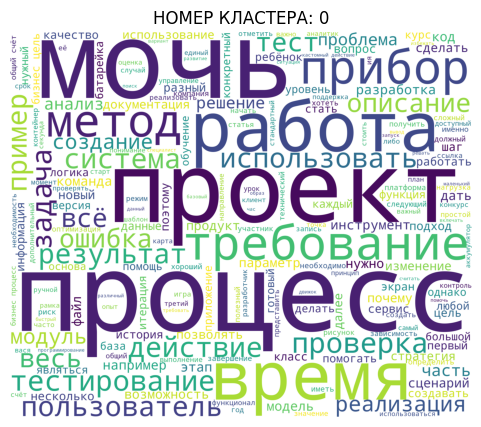

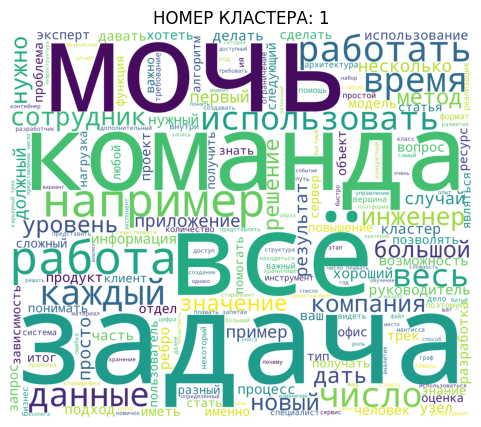

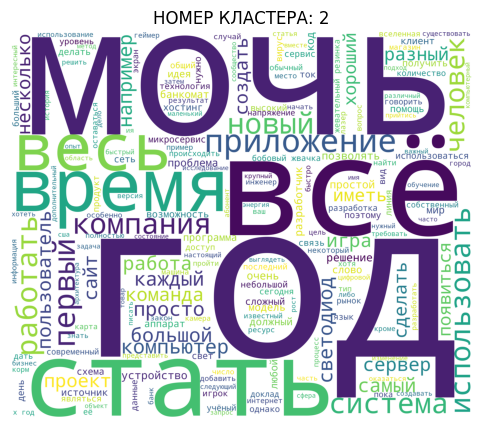

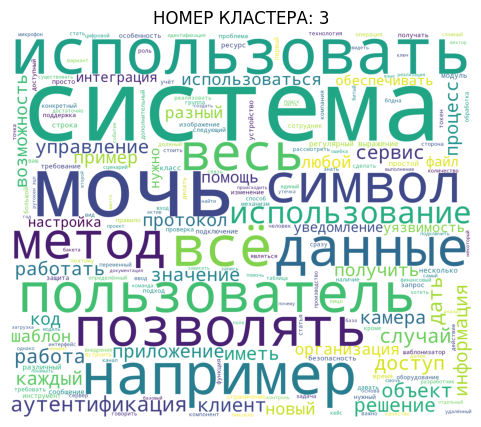

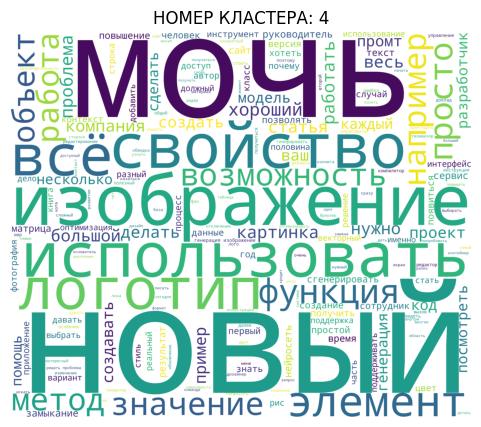

In [44]:
for i in sorted(df['cluster'].unique()):
    corpus = get_corpus(df[df['cluster'] == i].text_lemm.values)
    procWordCloud = get_wordCloud(corpus)
    
    fig = plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(procWordCloud)
    plt.axis('off')
    plt.title(f'НОМЕР КЛАСТЕРА: {i}')
    plt.subplot(1, 2, 1)

In [45]:
df_cluster = pd.DataFrame()

In [46]:
df_cluster['name'] = ['Аналитика данных', 'Управление системами', 'Технологии и развлечения', 'Биометрия и автоматизация', 'Программирование']

In [47]:
df_cluster

,name
0,Аналитика данных
1,Управление системами
2,Технологии и развлечения
3,Биометрия и автоматизация
4,Программирование


___

## Классификация

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [49]:
df.head()

,title,namecompany,description,rating,field,date,textpub,text_new,tokenize_texts,text_stem,text_lemm,cluster
0,SSTI в Python под микроскопом: разбираем Pytho...,BI.ZONE,Компания,76.41,"Программное обеспечение, Веб-сервисы, Информац...",2025-04-09,"Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...",привет хабр меня зовут сергей арефьев я специа...,привет хабр меня зовут сергей арефьев я специа...,привет хабр мен зовут серг ареф я специалист о...,привет хабра звать сергей арефьев специалист о...,3
1,Противовирусная жевательная резинка,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,169.07,"Аппаратное обеспечение, Связь и телекоммуникац...",2025-04-09,"Пандемия, последствия которой до сих пор наб...",пандемия последствия которой до сих пор наблю...,пандемия последствия которой до сих пор наблюд...,пандем последств котор до сих пор наблюда по в...,пандемия последствие сей пора наблюдаться весь...,2
2,Keycloak: как упростить аутентификацию и не со...,Clevertec,"Цифровые решения для бизнеса | финтех, логистика",59.14,"Программное обеспечение, Мобильные технологии,...",2025-04-09,"Привет! Я Диана, системный аналитик в Cleverte...",привет я диана системный аналитик в clevertec ...,привет я диана системный аналитик в и экс преп...,привет я диа системн аналитик в и экс преподав...,привет диана системный аналитик экс преподават...,3
3,Из чего сделаны GPU от Т1 Облако? Фотообзор и ...,Холдинг Т1,Многопрофильный ИТ-холдинг,125.41,"Программное обеспечение, Аппаратное обеспечени...",2025-04-09,"Привет, Хабр. На связи команда Т1 Облако. Если...",привет хабр на связи команда т облако если вы ...,привет хабр на связи команда т облако если вы ...,привет хабр на связ команд т облак есл вы след...,привет хабра связь команда облако следить ново...,1
4,Фундаментальные науки и ИТ: создание исследова...,Инферит,Компания,229.82,"Программное обеспечение, Аппаратное обеспечение",2025-04-09,Развитие информационных технологий — от первых...,развитие информационных технологий от первых а...,развитие информационных технологий от первых а...,развит информацион технолог от перв алгоритм д...,развитие информационный технология первый алго...,1


In [50]:
df['namecompany'].unique()

array(['BI.ZONE', 'ua-hosting.company', 'Clevertec', 'Холдинг Т1',
       'Инферит', 'Smart-AV Мультимедиа', 'OTUS', 'RUVDS.com', 'T.Hunter',
       'Raft', 'MWS', 'IT для детей', 'Surf', 'Usetech', 'Рунити',
       'Online patent', 'Selectel', 'SM Lab', 'МТС', 'Timeweb Cloud',
       'Точка', 'Minervasoft', 'Издательский дом «Питер»',
       'Группа компаний X-Com', 'Бастион', 'Сбер',
       'Конференции Олега Бунина (Онтико)', 'FirstVDS', 'SimbirSoft',
       'Домклик', 'Garage Eight', 'ПИК', 'F6',
       'Московский кредитный банк', 'НЛМК ИТ', 'ГК ЛАНИТ', 'Axiom JDK',
       'МойСклад', 'Яндекс Практикум', 'Газпромбанк', 'Контур',
       'Эксперт РП',
       'Институт системного программирования им. В.П. Иванникова РАН',
       'Product Radar', 'Avanpost', '«Лаборатория Касперского»',
       'Amnezia VPN', 'Т-Банк', 'Лаборатория Числитель', 'АО «ГНИВЦ»',
       'Reksoft', 'LURE IT', 'BotHub', 'SearchInform', 'YADRO',
       'Wunder Fund', 'Innovative People', 'SimpleOne', 'LampTest'

In [51]:
unique_companies = df['namecompany'].unique()
company_codes = {company: idx + 1 for idx, company in enumerate(unique_companies)}

df['company_code'] = df['namecompany'].map(company_codes)

In [52]:
df.head()

,title,namecompany,description,rating,field,date,textpub,text_new,tokenize_texts,text_stem,text_lemm,cluster,company_code
0,SSTI в Python под микроскопом: разбираем Pytho...,BI.ZONE,Компания,76.41,"Программное обеспечение, Веб-сервисы, Информац...",2025-04-09,"Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...",привет хабр меня зовут сергей арефьев я специа...,привет хабр меня зовут сергей арефьев я специа...,привет хабр мен зовут серг ареф я специалист о...,привет хабра звать сергей арефьев специалист о...,3,1
1,Противовирусная жевательная резинка,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,169.07,"Аппаратное обеспечение, Связь и телекоммуникац...",2025-04-09,"Пандемия, последствия которой до сих пор наб...",пандемия последствия которой до сих пор наблю...,пандемия последствия которой до сих пор наблюд...,пандем последств котор до сих пор наблюда по в...,пандемия последствие сей пора наблюдаться весь...,2,2
2,Keycloak: как упростить аутентификацию и не со...,Clevertec,"Цифровые решения для бизнеса | финтех, логистика",59.14,"Программное обеспечение, Мобильные технологии,...",2025-04-09,"Привет! Я Диана, системный аналитик в Cleverte...",привет я диана системный аналитик в clevertec ...,привет я диана системный аналитик в и экс преп...,привет я диа системн аналитик в и экс преподав...,привет диана системный аналитик экс преподават...,3,3
3,Из чего сделаны GPU от Т1 Облако? Фотообзор и ...,Холдинг Т1,Многопрофильный ИТ-холдинг,125.41,"Программное обеспечение, Аппаратное обеспечени...",2025-04-09,"Привет, Хабр. На связи команда Т1 Облако. Если...",привет хабр на связи команда т облако если вы ...,привет хабр на связи команда т облако если вы ...,привет хабр на связ команд т облак есл вы след...,привет хабра связь команда облако следить ново...,1,4
4,Фундаментальные науки и ИТ: создание исследова...,Инферит,Компания,229.82,"Программное обеспечение, Аппаратное обеспечение",2025-04-09,Развитие информационных технологий — от первых...,развитие информационных технологий от первых а...,развитие информационных технологий от первых а...,развит информацион технолог от перв алгоритм д...,развитие информационный технология первый алго...,1,5


In [53]:
# Добавляем новые столбцы, основываясь на тексте, чтобы модели классификации лучше обучились

df['text_length'] = df['text_lemm'].str.len() # общ. кол-во символов
df['word_count'] = df['text_lemm'].str.split().str.len() #кол-во слов
df['company_article_count'] = df.groupby('namecompany')['namecompany'].transform('count') # кол-во статей от одной компании
df['cluster_size'] = df.groupby('cluster')['cluster'].transform('count') #  количество статей в кластере

In [54]:
df.head()

,title,namecompany,description,rating,field,date,textpub,text_new,tokenize_texts,text_stem,text_lemm,cluster,company_code,text_length,word_count,company_article_count,cluster_size
0,SSTI в Python под микроскопом: разбираем Pytho...,BI.ZONE,Компания,76.41,"Программное обеспечение, Веб-сервисы, Информац...",2025-04-09,"Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...",привет хабр меня зовут сергей арефьев я специа...,привет хабр меня зовут сергей арефьев я специа...,привет хабр мен зовут серг ареф я специалист о...,привет хабра звать сергей арефьев специалист о...,3,1,13376,1510,2,17
1,Противовирусная жевательная резинка,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,169.07,"Аппаратное обеспечение, Связь и телекоммуникац...",2025-04-09,"Пандемия, последствия которой до сих пор наб...",пандемия последствия которой до сих пор наблю...,пандемия последствия которой до сих пор наблюд...,пандем последств котор до сих пор наблюда по в...,пандемия последствие сей пора наблюдаться весь...,2,2,19645,2187,1,24
2,Keycloak: как упростить аутентификацию и не со...,Clevertec,"Цифровые решения для бизнеса | финтех, логистика",59.14,"Программное обеспечение, Мобильные технологии,...",2025-04-09,"Привет! Я Диана, системный аналитик в Cleverte...",привет я диана системный аналитик в clevertec ...,привет я диана системный аналитик в и экс преп...,привет я диа системн аналитик в и экс преподав...,привет диана системный аналитик экс преподават...,3,3,9839,1087,1,17
3,Из чего сделаны GPU от Т1 Облако? Фотообзор и ...,Холдинг Т1,Многопрофильный ИТ-холдинг,125.41,"Программное обеспечение, Аппаратное обеспечени...",2025-04-09,"Привет, Хабр. На связи команда Т1 Облако. Если...",привет хабр на связи команда т облако если вы ...,привет хабр на связи команда т облако если вы ...,привет хабр на связ команд т облак есл вы след...,привет хабра связь команда облако следить ново...,1,4,6076,670,2,23
4,Фундаментальные науки и ИТ: создание исследова...,Инферит,Компания,229.82,"Программное обеспечение, Аппаратное обеспечение",2025-04-09,Развитие информационных технологий — от первых...,развитие информационных технологий от первых а...,развитие информационных технологий от первых а...,развит информацион технолог от перв алгоритм д...,развитие информационный технология первый алго...,1,5,6131,686,1,23


In [55]:
X = df.drop(columns=["title", 'namecompany', 'description', 'field', 'date', 'textpub',	'text_new',	'tokenize_texts', 'text_stem',	'text_lemm',	'cluster'])  # Признаки
y = df['cluster']  # Целевая переменная (метки кластеров)

In [56]:
X.head()

,rating,company_code,text_length,word_count,company_article_count,cluster_size
0,76.41,1,13376,1510,2,17
1,169.07,2,19645,2187,1,24
2,59.14,3,9839,1087,1,17
3,125.41,4,6076,670,2,23
4,229.82,5,6131,686,1,23


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [58]:
# Стандартизация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
# Функция для обучения и оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Итоги
    print(classification_report(y_test, y_pred))
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

In [60]:
# Модели для тестирования
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=200, max_depth=7)
}

In [61]:
# Оценка моделей
results = {}
for name, model in models.items():
    print(f"{name}")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

Logistic Regression
              precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       1.00      0.45      0.62        11
           2       0.40      1.00      0.57         4
           3       1.00      0.40      0.57         5
           4       0.80      0.80      0.80         5

    accuracy                           0.63        30
   macro avg       0.74      0.69      0.64        30
weighted avg       0.80      0.63      0.64        30

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00

In [62]:
# Создание таблицы для сравнения моделей
results_df = pd.DataFrame(results).T
print("Сравнение моделей классификации:")
print(results_df)

Сравнение моделей классификации:
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.633333   0.803333  0.633333  0.636493
Decision Tree        1.000000   1.000000  1.000000  1.000000
Random Forest        0.900000   0.902778  0.900000  0.898990


##### Лучше всего себя показала модель Decision Tree. Но т.к. это может быть связано с переобучением, лучше использовать **RandomForest**

___

## Тематическое моделирование

In [63]:
import gensim 
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [64]:
def tokenize2(text):
    t = word_tokenize(text)
    tokens = [token for token in t if token not in russian_stopwords]
    return tokens

In [65]:
df['lemm_tokenize'] = [tokenize2(text) for text in df['text_lemm']]

In [66]:
df.head()

,title,namecompany,description,rating,field,date,textpub,text_new,tokenize_texts,text_stem,text_lemm,cluster,company_code,text_length,word_count,company_article_count,cluster_size,lemm_tokenize
0,SSTI в Python под микроскопом: разбираем Pytho...,BI.ZONE,Компания,76.41,"Программное обеспечение, Веб-сервисы, Информац...",2025-04-09,"Привет, Хабр! Меня зовут Сергей Арефьев. Я спе...",привет хабр меня зовут сергей арефьев я специа...,привет хабр меня зовут сергей арефьев я специа...,привет хабр мен зовут серг ареф я специалист о...,привет хабра звать сергей арефьев специалист о...,3,1,13376,1510,2,17,"[привет, хабра, звать, сергей, арефьев, специа..."
1,Противовирусная жевательная резинка,ua-hosting.company,Хостинг-провайдер: серверы в NL до 300 Гбит/с,169.07,"Аппаратное обеспечение, Связь и телекоммуникац...",2025-04-09,"Пандемия, последствия которой до сих пор наб...",пандемия последствия которой до сих пор наблю...,пандемия последствия которой до сих пор наблюд...,пандем последств котор до сих пор наблюда по в...,пандемия последствие сей пора наблюдаться весь...,2,2,19645,2187,1,24,"[пандемия, последствие, сей, пора, наблюдаться..."
2,Keycloak: как упростить аутентификацию и не со...,Clevertec,"Цифровые решения для бизнеса | финтех, логистика",59.14,"Программное обеспечение, Мобильные технологии,...",2025-04-09,"Привет! Я Диана, системный аналитик в Cleverte...",привет я диана системный аналитик в clevertec ...,привет я диана системный аналитик в и экс преп...,привет я диа системн аналитик в и экс преподав...,привет диана системный аналитик экс преподават...,3,3,9839,1087,1,17,"[привет, диана, системный, аналитик, экс, преп..."
3,Из чего сделаны GPU от Т1 Облако? Фотообзор и ...,Холдинг Т1,Многопрофильный ИТ-холдинг,125.41,"Программное обеспечение, Аппаратное обеспечени...",2025-04-09,"Привет, Хабр. На связи команда Т1 Облако. Если...",привет хабр на связи команда т облако если вы ...,привет хабр на связи команда т облако если вы ...,привет хабр на связ команд т облак есл вы след...,привет хабра связь команда облако следить ново...,1,4,6076,670,2,23,"[привет, хабра, связь, команда, облако, следит..."
4,Фундаментальные науки и ИТ: создание исследова...,Инферит,Компания,229.82,"Программное обеспечение, Аппаратное обеспечение",2025-04-09,Развитие информационных технологий — от первых...,развитие информационных технологий от первых а...,развитие информационных технологий от первых а...,развит информацион технолог от перв алгоритм д...,развитие информационный технология первый алго...,1,5,6131,686,1,23,"[развитие, информационный, технология, первый,..."


In [67]:
# Функция для алгоритма тематического моделирования, который выявляет скрытые темы
def lda5_model(df):
    gensim_dictionary = gensim.corpora.Dictionary(df['lemm_tokenize']) # преобразовываем токены в словарь

    corpus = [gensim_dictionary.doc2bow(text) for text in df['lemm_tokenize']] # получаем кортеж "мешка слов"

    lda_5 = gensim.models.LdaMulticore(corpus, 
                                 num_topics=5, 
                                 id2word=gensim_dictionary, 
                                 passes=10, random_state=6457)

    for tpl in lda_5.print_topics():
        print(tpl, end='\n\n')
    print()
    
    vis_5 = gensimvis.prepare(lda_5, corpus, gensim_dictionary)
    pyLDAvis.enable_notebook()
    display(pyLDAvis.display(vis_5))

In [68]:
# Функция для алгоритма снижения размерности, который выявляет скрытые темы
from sklearn.decomposition import TruncatedSVD

def lsa5_model(df):
    tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000,
                                 min_df=0.01, stop_words=russian_stopwords,
                                 ngram_range=(1,3))
    
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_lemm'])
    
    lsa_model = TruncatedSVD(n_components=5, random_state=0)
    lsa_model.fit(tfidf_matrix)
    
    for i, topic in enumerate(lsa_model.components_):
        print(f"Тема номер {i}: {', '.join([tfidf_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-11:-1]])}")

In [69]:
print('LDA модель\n' + '_' * 100)
for cluster in sorted(df['cluster'].unique()):
    new_df = df[df['cluster'] == cluster]
    print(f'КЛАСТЕР: {cluster}\n')
    lda5_model(new_df)
    print('_' * 100)

LDA модель
____________________________________________________________________________________________________
КЛАСТЕР: 0

(0, '0.017*"действие" + 0.014*"процесс" + 0.009*"проверка" + 0.007*"метод" + 0.006*"задача" + 0.006*"решение" + 0.006*"результат" + 0.005*"класс" + 0.005*"мочь" + 0.005*"оптимизация"')

(1, '0.012*"–" + 0.009*"работа" + 0.009*"процесс" + 0.008*"ия" + 0.008*"рисунок" + 0.007*"документация" + 0.007*"анализ" + 0.007*"сценарий" + 0.006*"описание" + 0.006*"мочь"')

(2, '0.013*"проект" + 0.012*"мочь" + 0.011*"требование" + 0.010*"пользователь" + 0.009*"тестирование" + 0.008*"бизнес" + 0.008*"цель" + 0.008*"стратегия" + 0.007*"счёт" + 0.006*"процесс"')

(3, '0.025*"прибор" + 0.023*"тест" + 0.013*"напряжение" + 0.012*"модуль" + 0.012*"ток" + 0.012*"батарейка" + 0.011*"кнопка" + 0.010*"шунт" + 0.009*"экран" + 0.009*"измерение"')

(4, '0.019*"игра" + 0.014*"курс" + 0.013*"программирование" + 0.013*"ребёнок" + 0.012*"–" + 0.010*"роблокс" + 0.007*"проект" + 0.006*"ссылка" + 0

____________________________________________________________________________________________________
КЛАСТЕР: 1

(0, '0.008*"задача" + 0.008*"мочь" + 0.006*"данные" + 0.006*"тренировка" + 0.005*"сеанс" + 0.005*"метод" + 0.005*"модель" + 0.005*"оценка" + 0.004*"команда" + 0.004*"сторипоинт"')

(1, '0.009*"задача" + 0.008*"команда" + 0.007*"сотрудник" + 0.007*"инженер" + 0.007*"компания" + 0.007*"трек" + 0.007*"кластер" + 0.007*"мочь" + 0.006*"например" + 0.006*"работа"')

(2, '0.009*"задача" + 0.008*"аналитик" + 0.007*"работать" + 0.007*"ия" + 0.006*"мочь" + 0.006*"всё" + 0.005*"требование" + 0.005*"системный" + 0.004*"работа" + 0.004*"структура"')

(3, '0.026*"узел" + 0.025*"граф" + 0.014*"ребро" + 0.013*"→" + 0.012*"задача" + 0.010*"вершина" + 0.010*"время" + 0.009*"должный" + 0.009*"алгоритм" + 0.008*"компонент"')

(4, '0.026*"число" + 0.013*"значение" + 0.009*"представление" + 0.008*"запятая" + 0.007*"всё" + 0.007*"экспонент" + 0.007*"данные" + 0.007*"битый" + 0.006*"мочь" + 0.006*"

____________________________________________________________________________________________________
КЛАСТЕР: 2

(0, '0.009*"закон" + 0.008*"год" + 0.005*"мочь" + 0.005*"доклад" + 0.005*"человек" + 0.004*"всё" + 0.004*"корм" + 0.004*"хороший" + 0.004*"зоомагазин" + 0.004*"весь"')

(1, '0.010*"вирус" + 0.008*"жвачка" + 0.008*"бобовый" + 0.006*"мг" + 0.006*"жевательный" + 0.006*"резинка" + 0.005*"год" + 0.005*"мочь" + 0.004*"день" + 0.004*"всё"')

(2, '0.011*"год" + 0.011*"приложение" + 0.007*"сервер" + 0.007*"банкомат" + 0.006*"сайт" + 0.006*"пользователь" + 0.006*"карта" + 0.006*"хостинг" + 0.005*"компьютер" + 0.005*"веб"')

(3, '0.009*"год" + 0.005*"мочь" + 0.005*"игра" + 0.005*"аппарат" + 0.004*"весь" + 0.004*"время" + 0.004*"схема" + 0.003*"стать" + 0.003*"микросервис" + 0.003*"всё"')

(4, '0.015*"год" + 0.010*"светодиод" + 0.007*"лазер" + 0.007*"рис" + 0.005*"мочь" + 0.005*"лазерный" + 0.004*"свет" + 0.004*"сазерленд" + 0.004*"система" + 0.003*"диод"')




____________________________________________________________________________________________________
КЛАСТЕР: 3

(0, '0.013*"система" + 0.012*"символ" + 0.009*"мочь" + 0.008*"данные" + 0.007*"например" + 0.007*"метод" + 0.007*"всё" + 0.006*"значение" + 0.006*"объект" + 0.006*"использовать"')

(1, '0.015*"идентификация" + 0.013*"бпдна" + 0.012*"субъект" + 0.012*"биометрический" + 0.010*"система" + 0.010*"ебс" + 0.009*"шаблон" + 0.009*"🟣" + 0.008*"скуда" + 0.008*"математический"')

(2, '0.013*"система" + 0.012*"аутентификация" + 0.009*"пользователь" + 0.008*"камера" + 0.007*"мочь" + 0.007*"использовать" + 0.007*"–" + 0.006*"доступ" + 0.006*"сервис" + 0.005*"позволять"')

(3, '0.021*"система" + 0.016*"ит" + 0.013*"управление" + 0.013*"актив" + 0.010*"процесс" + 0.010*"учёт" + 0.008*"производство" + 0.007*"оборудование" + 0.007*"финансовый" + 0.007*"решение"')

(4, '0.014*"протечка" + 0.011*"звонок" + 0.008*"мочь" + 0.007*"датчик" + 0.007*"поддержка" + 0.007*"библиотека" + 0.007*"вода" + 0

____________________________________________________________________________________________________
КЛАСТЕР: 4

(0, '0.028*"свойство" + 0.017*"элемент" + 0.017*"значение" + 0.011*"использовать" + 0.008*"синтаксис" + 0.008*"“" + 0.008*"”" + 0.006*"мочь" + 0.006*"знать" + 0.006*"медиа"')

(1, '0.019*"замыкание" + 0.014*"метод" + 0.012*"доступ" + 0.011*"приватный" + 0.010*"использовать" + 0.010*"класс" + 0.007*"объект" + 0.007*"создавать" + 0.007*"контекст" + 0.006*"новый"')

(2, '0.010*"мочь" + 0.008*"компания" + 0.008*"руководитель" + 0.008*"матрица" + 0.007*"сотрудник" + 0.007*"повышение" + 0.006*"работа" + 0.006*"новый" + 0.006*"изображение" + 0.006*"рис"')

(3, '0.020*"изображение" + 0.009*"новый" + 0.008*"генерация" + 0.007*"возможность" + 0.007*"модель" + 0.006*"книга" + 0.006*"мочь" + 0.006*"визуальный" + 0.005*"использовать" + 0.005*"контент"')

(4, '0.009*"логотип" + 0.008*"новый" + 0.006*"функция" + 0.006*"мочь" + 0.005*"изображение" + 0.005*"промт" + 0.004*"проблема" + 0.004*

____________________________________________________________________________________________________


In [70]:
print('LSA Model\n' + '_' * 100)
for cluster in sorted(df['cluster'].unique()):
    new_df = df[df['cluster'] == cluster]
    print(f'Кластер: {cluster}\n')
    lsa5_model(new_df)
    print('_' * 100)

LSA Model
____________________________________________________________________________________________________
Кластер: 0

Тема номер 0: игра, проверка, проект, программирование, ребёнок, действие, стратегия, курс, тестирование, пользователь
Тема номер 1: игра, ребёнок, программирование, курс, роблокс, удаться, движок, игра роблокс, школьник, ссылка
Тема номер 2: оптимизация, бизнес, требование, проект, пользователь, счёт, решение, конкурс, точка, этап
Тема номер 3: прибор, тест, стратегия, тестирование, напряжение, ток, батарейка, шунт, кнопка, измерение
Тема номер 4: вася, почему, действие, кирилл, стратегия, ия, прод, метод, кран, класс
____________________________________________________________________________________________________
Кластер: 1

Тема номер 0: модель, сотрудник, команда, кластер, компания, ия, трек, приложение, инженер, компилятор
Тема номер 1: компилятор, компиляция, объект, метод, структура, приложение, исключение, тренировка, сеанс, сборка
Тема номер 2: модель, 

____

## Вывод кластеров и сравнение

In [71]:
df_cluster.head()

,name
0,Аналитика данных
1,Управление системами
2,Технологии и развлечения
3,Биометрия и автоматизация
4,Программирование


#### Кластер 0 (Аналитика данных)

In [72]:
cluster_0_articles = df[df['cluster'] == 0][['title', 'textpub']].head()

for idx, row in cluster_0_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: Чем полезны курсы программирования для школьников 6-го класса? Что могут сделать дети в 12 лет + подборка онлайн-уроков

Text: Привет! На связи Ксюша – автор в блоге «IT для детей». Пишу для родителей современных школьников, рассказываю о школах и курсах, а также о направлениях, полезных с точки зрения детского образования в айти.Сегодня предлагаю поговорить об уроках программирования для 6-классников, обозначить аспект пользы занятий. Также попытаюсь обосновать, что соответствующие начинания вполне реализуемы, при этом будут ссылаться на исследования ученых, в том числе педагогов. В конце представлю подборку тематических курсов, условное резюме и ответы на распространенные вопросы по теме, а также ссылки на полезные статьи по теме.Сразу отмечу, что не претендую на звание профи, однако в силу собственной специализации – регулярных обзоров курсов и школ программирования для начинающих детей – обладаю определенными профильными знаниями и представлениями о том, как устроен учебный 

Все статьи подходят под тематику кластера, т.к они в в той или иной форме связаны с аналитикой (упоминания баз данных, дашбордов и т.д.)

#### Кластер 1 (Управление системами)

In [73]:
cluster_1_articles = df[df['cluster'] == 1][['title', 'textpub']].head()

for idx, row in cluster_1_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: Из чего сделаны GPU от Т1 Облако? Фотообзор и примеры применения

Text: Привет, Хабр. На связи команда Т1 Облако. Если вы следите за новостями в мире серверных видеокарт для ML, то точно знаете об Nvidia H100 — вычислительной молотилке на GPU, даже не имеющей видеовыхода. Она играет важную роль в области машинного обучения, анализа больших данных, 3D‑моделирования и много другого. Устройство корпоративного уровня, то есть домой себе такое купят разве что полтора энтузиаста. Сегодня поделимся небольшим аппаратным обзором серверов с этими графическими ускорителями и расскажем, для каких задач их используют наши коллеги, клиенты и другие компании. Сравнение с предыдущим поколениемПодробные спецификации вы можете почитать на сайте Nvidia. А если лень, то вот краткая выжимка: В основе Nvidia H100 лежит архитектура Hopper.Тензорные ядра NVLink четвёртого поколения и модуль Transformer Engine с точностью FP8 ускоряют по сравнению с видеокартой Nvidia A100:преобразования Фурье — до 6 ра

Название «Управление системами» слишком узкое. 
Лучше выбрать «Безопасность и управление системами»

#### Кластер 2 (Технологии и развлечения)

In [74]:
cluster_2_articles = df[df['cluster'] == 2][['title', 'textpub']].head()

for idx, row in cluster_2_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: Противовирусная жевательная резинка

Text:   Пандемия, последствия которой до сих пор наблюдаются по всему миру, показала то, что иммунологи и вирусологи знали давно, но простые обыватели частенько игнорировали, — вирусы обожают распространяться от одного человека к другому. Повышение иммунной защиты общества путем вакцинации также является проблемой ввиду либо отсутствия вакцины или необходимой инфраструктуры, либо нежелания людей вакцинироваться, несмотря на ее явную пользу. Также стоит учесть, что далеко не для всех вирусов имеется полноценная вакцина. Одним из таких является вирус простого герпеса (ВПГ или HSV от Herpes Simplex Virus). Ученые из Пенсильванского университета (США) разработали необычный метод снижения вирусной нагрузки в виде жевательной резинки. Из чего состоит эта жвачка, как именно она работает, и насколько она эффективна? Ответы на эти вопросы мы узнаем в докладе ученых.  Основа исследования В современном тесно взаимосвязанном мире инфекционные заболевания

#### Кластер 3 (Биометрия и автоматизация)

In [75]:
cluster_3_articles = df[df['cluster'] == 3][['title', 'textpub']].head()

for idx, row in cluster_3_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: SSTI в Python под микроскопом: разбираем Python-шаблонизаторы

Text: Привет, Хабр! Меня зовут Сергей Арефьев. Я специалист отдела анализа защищенности приложений в компании BI.ZONE. В этой статье хочу подробно раскрыть тему SSTI (server-side template injection) в контексте Python 3. Сразу оговорюсь, что это не какой-то новый ресерч с rocket-science-векторами. Я лишь взял уже известные PoC и посмотрел, как и почему они работают, для более полного понимания вопроса.Я рассмотрю, какой импакт атакующие могут получить, используя SSTI в пяти самых популярных шаблонизаторах для Python: Jinja2, Django Templates, Mako, Chameleon, Tornado Templates. Кроме того, немного углублюсь в работу известных PoC. Я поделюсь опытом и вариантами улучшения тех PoC, которые могут быть полезны при тестировании.Несколько слов о шаблонизаторахНачнем с самого базового: что такое шаблонизаторы, для чего они применяются и где их можно встретить.Шаблонизаторы — это инструменты для динамической генерации тексто

#### Кластер 4 (Программирование)

In [76]:
cluster_4_articles = df[df['cluster'] == 4][['title', 'textpub']].head()

for idx, row in cluster_4_articles.iterrows():
    print(f"Title: {row['title']}\n")
    print(f"Text: {row['textpub']}\n")
    print("_" * 30 + "\n")

Title: MERGE + OUTPUT: Upsert с логированием без триггеров

Text: Привет, Хабр!Сегодня поговорим про MERGE в MS SQL Server. Не просто MERGE, а MERGE с OUTPUT — как обновлять данные, вставлять новые и одновременно логировать изменения. Оператор MERGE позволяет объединить INSERT, UPDATE и DELETE. Клаузу OUTPUT можно прикрутить, чтобы получить, что именно поменялось — с деталями: было, стало, когда, зачем и кто виноват.Пример. Есть у нас:таблица Products — основной справочникUpdatedProducts — новые данныеProductChangesLog — журнал измененийСоздаём таблицы:CREATE TABLE Products (     ProductID INT PRIMARY KEY,     ProductName NVARCHAR(100),     Price DECIMAL(10,2),     LastUpdated DATETIME DEFAULT GETDATE() );  CREATE TABLE UpdatedProducts (     ProductID INT PRIMARY KEY,     ProductName NVARCHAR(100),     Price DECIMAL(10,2) );  CREATE TABLE ProductChangesLog (     LogID INT IDENTITY(1,1) PRIMARY KEY,     Action NVARCHAR(10),     ProductID INT,     OldProductName NVARCHAR(100),     NewPro

Тема кластера подходит для статьей.

___

## Сохранение файлов для ML

In [77]:
model = models['Random Forest']

In [78]:
model

RandomForestClassifier(max_depth=7, n_estimators=200, random_state=42)

In [81]:
#Сохранение модели
import pickle


with open("RandomForest.pkl", 'wb') as file:
    pickle.dump(model, file)

In [82]:
#Сохранение векторайзера
import pickle

model = tfidf_vectorizer

with open("tfidf_vectorizer.pkl", 'wb') as file:
    pickle.dump(model, file)

## Вывод

**Таким образом, мы:**

1. Загрузили наш спарсенный датасет со спарсенными статьями хабра;

2. Провели предварительную обработку (перевели все буквы в нижний регистр, удалили знаки препинания, сделали токенизацию по словам, привели слова к нормальной форме (стемминг), лемматизация и удаление стоп-слов);

3. Сделали стандартизацию данных и разбили наш датасет на 5 кластеров, посмотрели их облако слов;

4. Создали отдельную таблицу с кластерами и их описанием по облакам слов;

5. Обучили модели классификации, их метрики и выявили лучшую модель - Logistic Regression;

6. Провели тематическое моделирование с помощью LSA и LDM;

7. Вывели первые 5 строк в каждом кластере и сравнили их с выбранной темой.